In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file = 'Analysis.xlsx'

In [4]:
class PointMarker():
    def __init__(self, ax, point, **kwargs):
        self.ax = ax
        self.point = point
        if "cc" in kwargs:
            self.c = kwargs.get("cc")
            self.label = kwargs.get('label')
        else:
            self.c = kwargs.get("color", "b")
        self.ls=kwargs.get("linestyle", ':')
        self.vline, = self.ax.plot([],[],color=self.c,linestyle=self.ls, alpha=0.4)
        self.hline, = self.ax.plot([],[],color=self.c,linestyle=self.ls, label = self.label, alpha=0.6)
        self.draw()

    def draw(self):
        xmin = self.ax.get_xlim()[0]
        ymin = self.ax.get_ylim()[0]
        self.vline.set_data([self.point[0], self.point[0]], [ymin,self.point[1]])
        self.hline.set_data([xmin, self.point[0]], [self.point[1], self.point[1]])

class PointMarkers():
    pointmarkers = []
    def add(self,ax, point, **kwargs ):
        pm = PointMarker(ax, point, **kwargs)
        self.pointmarkers.append(pm)
    def update(self, event=None):
        for pm in self.pointmarkers:
            pm.draw()
            
def plotpoint(ax,point,cc,label):
    p = PointMarkers()
    p.add(ax,point, cc = cc, label = label, linestyle='--')
    ax.plot(point[0],point[1],'o', color = cc, alpha = 0.6, markersize =10)

# IRIS Dataset

In [221]:
data = pd.read_excel(file,sheet_name='IRIS', usecols = "B:F", header = None)

In [222]:
bonsai = data[1:4].values

In [223]:
protonn = data[11:14].values[:,:4]

In [224]:
bnc = data[16:19].values[:,[0,1,2]]

In [225]:
bnc

array([[ 7.    ,  8.    , 11.    ],
       [ 0.6052,  0.657 ,  0.657 ],
       [ 0.696 ,  0.6904,  0.66  ]])

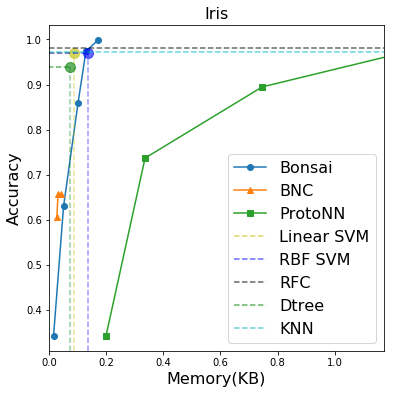

In [226]:
fig, aax = plt.subplots(1,1,figsize=[6,6])
ax = [aax,aax]
ax[0].plot(bonsai[0,:]/256,bonsai[1,:],'-o', label = 'Bonsai')
ax[0].plot(bnc[0,:]/256,bnc[1,:],'-^', label = 'BNC')
ax[0].plot(protonn[0,:]/256,protonn[1,:],'-s', label = 'ProtoNN')
ax[0].set_title('Iris',fontsize = 16)
ax[0].set_xlabel('Memory(KB)',fontsize = 16)
ax[0].set_ylabel('Accuracy',fontsize = 16)

plotpoint(ax[0],[22/256,0.97],'y','Linear SVM')
plotpoint(ax[0],[35/256,0.97],'b','RBF SVM')
plotpoint(ax[0],[538/256,0.98],'k','RFC')
plotpoint(ax[0],[19/256,0.94],'g','Dtree')
plotpoint(ax[0],[2009/256,0.9726],'c','KNN')

ax[0].legend(fontsize = 16)
ax[0].set_xlim(0,300/256)

# ax[1].plot(bonsai[0,:],bonsai[2,:],'-o', label = 'Bonsai')
# ax[1].plot(bnc[0,:],bnc[2,:],'-^', label = 'BNC')
# ax[1].plot(protonn[0,:],protonn[2,:],'-s', label = 'ProtoNN')

# ax[1].set_title('Memory vs Test time',fontsize = 16)
# ax[1].set_xlabel('Memory',fontsize = 16)
# ax[1].set_ylabel('Test time(sec)',fontsize = 16)

# plotpoint(ax[1],[2200,0.97],'y','Linear SVM')
# plotpoint(ax[1],[3500,0.97],'b','RBF SVM')
# plotpoint(ax[1],[53800,0.98],'k','RFC')
# plotpoint(ax[1],[1900,0.94],'g','Dtree')
# plotpoint(ax[1],[20009,0.9726],'c','KNN')

# ax[1].set_xlim(0,500)
# ax[1].legend(fontsize = 16)
plt.savefig('iris.png')
plt.show()

# MNIST Dataset

In [227]:
data = pd.read_excel(file,sheet_name='MNIST', usecols = "B:G", header = None)

In [228]:
bonsai = data[1:4].values[:,:4]

In [229]:
protonn = data[57:60].values[:,:4]
# protonn = np.concatenate([np.array([0.0,0.0,0.0]).reshape(3,1),protonn], axis = 1)

In [230]:
protonn[1][0] = 0.734

In [231]:
bnc = data[11:14].values[:,:5]

In [232]:
consai = data[16:19].values[:,:3]

In [233]:
consai

array([[2.057e+03, 1.008e+03, 1.700e+02],
       [9.100e-01, 9.248e-01, 8.640e-01],
       [4.400e-01, 4.100e-01, 3.970e-01]])

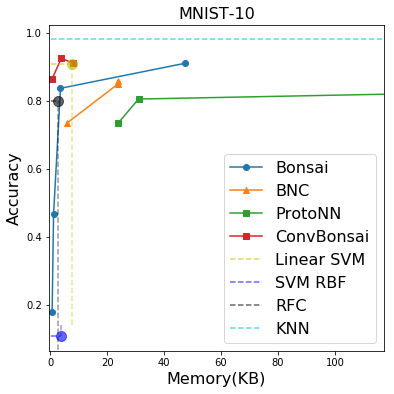

In [239]:
fig, aax = plt.subplots(1,1,figsize=[6,6])
ax = [aax,aax]
ax[0].plot(bonsai[0,:]/256,bonsai[1,:],'-o', label = 'Bonsai')
ax[0].plot(bnc[0,:]/256,bnc[1,:],'-^', label = 'BNC')
ax[0].plot(protonn[0,:]/256,protonn[1,:],'-s', label = 'ProtoNN')
ax[0].plot(consai[0,:]/256,consai[1,:],'-s', label = 'ConvBonsai')
ax[0].set_title('MNIST-10',fontsize = 16)
ax[0].set_xlabel('Memory(KB)',fontsize = 16)
ax[0].set_ylabel('Accuracy',fontsize = 16)

plotpoint(ax[0],[1953/256,0.908],'y','Linear SVM')
plotpoint(ax[0],[1000/256,0.108],'b','SVM RBF')
plotpoint(ax[0],[700/256,0.8],'k','RFC')
# plotpoint(ax[0],[7840,0.88],'g','Dtree')
plotpoint(ax[0],[200900/256,0.98],'c','KNN')

ax[0].legend(fontsize = 16)
ax[0].set_xlim(-100/256,30000/256)

# ax[1].plot(bonsai[0,:],bonsai[2,:],'-o', label = 'Bonsai')
# ax[1].plot(bnc[0,:],bnc[2,:],'-^', label = 'BNC')
# ax[1].plot(protonn[0,:],protonn[2,:],'-s', label = 'ProtoNN')
# ax[1].legend(fontsize = 16)
# ax[1].set_title('Memory vs Test time',fontsize = 16)
# ax[1].set_xlabel('Memory',fontsize = 16)
# ax[1].set_ylabel('Test time(sec)',fontsize = 16)


plt.savefig('mnist.png')


plt.show()

# USPS Dataset

In [240]:
data = pd.read_excel(file,sheet_name='USPS', usecols = "B:F", header = None)

In [241]:
bonsai = data[1:4].values[:,:5]

In [242]:
protonn = np.concatenate([np.array(data[11:14].values[:,:4])])

In [243]:
protonn

array([[14350.0, 15850, 18850.0, 24850.0],
       [0.9063, 0.9138, 0.9192, 0.9193],
       [0.048, 0.0781, 0.1094, 0.1718]], dtype=object)

In [244]:
bnc = data[16:19].values[:,:3]

In [245]:
bonsai

array([[1573.0, 562, 221.0, 84.0, 18.0],
       [0.9347, 0.9, 0.771, 0.384, 0.1788],
       [0.0316, 0.021, 0.0153, 0.0104, 0.009]], dtype=object)

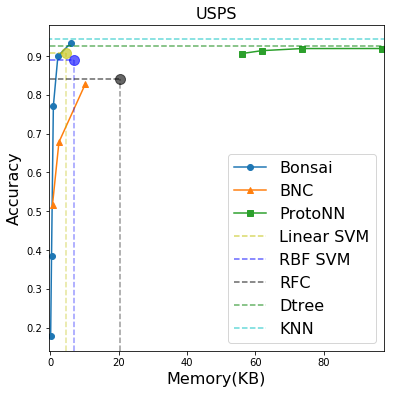

In [246]:
fig, aax = plt.subplots(1,1,figsize=[6,6])
ax = [aax,aax]
ax[0].plot(bonsai[0,:]/256,bonsai[1,:],'-o', label = 'Bonsai')
ax[0].plot(bnc[0,:]/256,bnc[1,:],'-^', label = 'BNC')
ax[0].plot(protonn[0,:]/256,protonn[1,:],'-s', label = 'ProtoNN')
ax[0].set_title('USPS',fontsize = 16)
ax[0].set_xlabel('Memory(KB)',fontsize = 16)
ax[0].set_ylabel('Accuracy',fontsize = 16)

plotpoint(ax[0],[1153/256,0.908],'y','Linear SVM')
plotpoint(ax[0],[1749/256,0.89],'b','RBF SVM')
plotpoint(ax[0],[5206/256,0.84],'k','RFC')
plotpoint(ax[0],[78400/256,0.926],'g','Dtree')
plotpoint(ax[0],[200900,0.9426],'c','KNN')

ax[0].legend(fontsize = 16)
ax[0].set_xlim(-100/256,25000/256)

# ax[1].plot(bonsai[0,:],bonsai[2,:],'-o', label = 'Bonsai')
# ax[1].plot(bnc[0,:],bnc[2,:],'-^', label = 'BNC')
# ax[1].plot(protonn[0,:],protonn[2,:],'-s', label = 'ProtoNN')
# ax[1].legend(fontsize = 16)
# ax[1].set_title('Memory vs Test time',fontsize = 16)
# ax[1].set_xlabel('Memory',fontsize = 16)
# ax[1].set_ylabel('Test time(sec)',fontsize = 16)


plt.savefig('usps.png')


plt.show()

# notMNIST Dataset

In [247]:
data = pd.read_excel(file,sheet_name='notMNIST', usecols = "B:E", header = None)

In [248]:
bonsai = data[1:4].values[:,:4]

In [249]:
protonn = data[6:9].values[:,:4]
# protonn = np.concatenate([np.array([0.0,0.0,0.0]).reshape(3,1),protonn], axis = 1)

In [250]:
bnc = data[17:20].values[:,[0,2,1]]

In [251]:
consai = data[11:14].values[:,:4]

In [252]:
consai

array([[8021.0, 1637, 541.0, 151.0],
       [0.923, 0.81, 0.7414, 0.47806],
       [0.85, 0.45, 0.41, 0.4]], dtype=object)

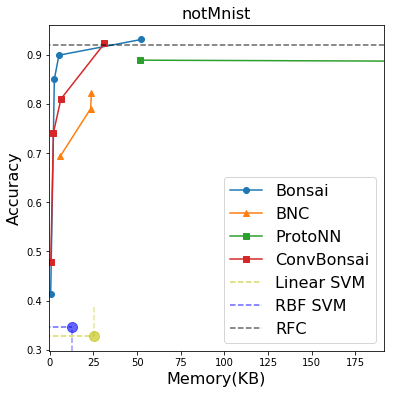

In [257]:
fig, aax = plt.subplots(1,1,figsize=[6,6])
ax = [aax,aax]
ax[0].plot(bonsai[0,:]/256,bonsai[1,:],'-o', label = 'Bonsai')
ax[0].plot(bnc[0,:]/256,bnc[1,:],'-^', label = 'BNC')
ax[0].plot(protonn[0,:]/256,protonn[1,:],'-s', label = 'ProtoNN')
ax[0].plot(consai[0,:]/256,consai[1,:],'-s', label = 'ConvBonsai')
ax[0].set_title('notMnist',fontsize = 16)
ax[0].set_xlabel('Memory(KB)',fontsize = 16)
ax[0].set_ylabel('Accuracy',fontsize = 16)

plotpoint(ax[0],[6523/256,0.328],'y','Linear SVM')
plotpoint(ax[0],[3256/256,0.3457],'b','RBF SVM')
plotpoint(ax[0],[193090/256,0.92],'k','RFC')
# # plotpoint(ax[0],[7840,0.88],'g','Dtree')
# plotpoint(ax[0],[200900,0.9926],'c','KNN')

ax[0].legend(fontsize = 16)
ax[0].set_xlim(-100/256,49000/256)

# ax[1].plot(bonsai[0,:],bonsai[2,:],'-o', label = 'Bonsai')
# ax[1].plot(bnc[0,:],bnc[2,:],'-^', label = 'BNC')
# ax[1].plot(protonn[0,:],protonn[2,:],'-s', label = 'ProtoNN')
# ax[1].legend(fontsize = 16)
# ax[1].set_title('Memory vs Test time',fontsize = 16)
# ax[1].set_xlabel('Memory',fontsize = 16)
# ax[1].set_ylabel('Test time(sec)',fontsize = 16)


plt.savefig('notmnist.png')


plt.show()

# madelon Dataset

In [258]:
data = pd.read_excel(file,sheet_name='MADELON', usecols = "B:E", header = None)

In [259]:
bonsai = data[6:9].values[:,:4]

In [260]:
protonn = data[1:4].values[:,:4]
# protonn = np.concatenate([np.array([0.0,0.0,0.0]).reshape(3,1),protonn], axis = 1)

In [261]:
# bnc = data[17:20].values[:,[0,2,1]]

In [262]:
# consai = data[11:14].values[:,:4]

In [263]:
consai

array([[8021.0, 1637, 541.0, 151.0],
       [0.923, 0.81, 0.7414, 0.47806],
       [0.85, 0.45, 0.41, 0.4]], dtype=object)

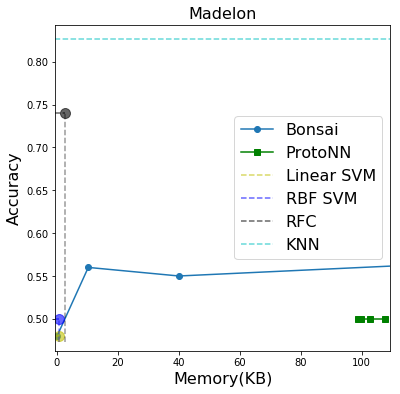

In [266]:
fig, aax = plt.subplots(1,1,figsize=[6,6])
ax = [aax,aax]
ax[0].plot(bonsai[0,:]/256,bonsai[1,:],'-o', label = 'Bonsai')
# ax[0].plot(bnc[0,:],bnc[1,:],'-^', label = 'BNC')
ax[0].plot(protonn[0,:]/256,protonn[1,:],'-gs', label = 'ProtoNN')
# ax[0].plot(consai[0,:],consai[1,:],'-s', label = 'ConvBonsai')
ax[0].set_title('Madelon',fontsize = 16)
ax[0].set_xlabel('Memory(KB)',fontsize = 16)
ax[0].set_ylabel('Accuracy',fontsize = 16)

plotpoint(ax[0],[190/256,0.48],'y','Linear SVM')
plotpoint(ax[0],[200/256,0.5],'b','RBF SVM')
plotpoint(ax[0],[700/256,0.74],'k','RFC')
# # plotpoint(ax[0],[7840,0.88],'g','Dtree')
plotpoint(ax[0],[200000/256,0.826],'c','KNN')

ax[0].legend(fontsize = 16)
ax[0].set_xlim(-100/256,28000/256)

# ax[1].plot(bonsai[0,:],bonsai[2,:],'-o', label = 'Bonsai')
# # ax[1].plot(bnc[0,:],bnc[2,:],'-^', label = 'BNC')
# ax[1].plot(protonn[0,:],protonn[2,:],'-gs', label = 'ProtoNN')
# ax[1].legend(fontsize = 16)
# ax[1].set_title('Memory vs Test time',fontsize = 16)
# ax[1].set_xlabel('Memory',fontsize = 16)
# ax[1].set_ylabel('Test time(sec)',fontsize = 16)

plt.savefig('madelon.png')


plt.show()

# Cifar Dataset

In [267]:
data = pd.read_excel(file,sheet_name='CIFAR', usecols = "B:E", header = None)

In [268]:
bonsai = data[11:14].values[:,:3]

In [286]:
protonn = data[6:9].values[:,:4]
protonn = np.concatenate([np.array([0.0,0.0,0.0]).reshape(3,1),protonn], axis = 1)

In [287]:
bnc = data[17:20].values[:,[0,1]]

In [288]:
consai = data[1:4].values[:,:3]

In [289]:
consai

array([[16255.0, 5073, 2178.0],
       [0.6, 0.43, 0.29],
       [0.88, 0.23, 0.21]], dtype=object)

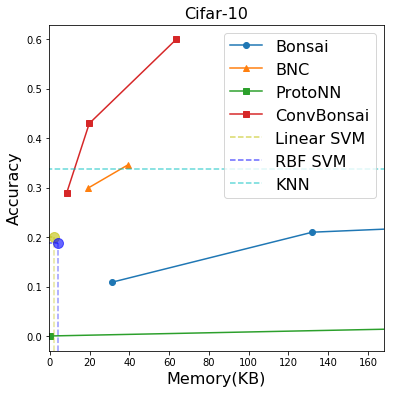

In [298]:
fig, aax = plt.subplots(1,1,figsize=[6,6])
ax = [aax,aax]
ax[0].plot(bonsai[0,:]/256,bonsai[1,:],'-o', label = 'Bonsai')
ax[0].plot(bnc[0,:]/256,bnc[1,:],'-^', label = 'BNC')
ax[0].plot(protonn[0,:]/256,protonn[1,:],'-s', label = 'ProtoNN')
ax[0].plot(consai[0,:]/256,consai[1,:],'-s', label = 'ConvBonsai')
ax[0].set_title('Cifar-10',fontsize = 16)
ax[0].set_xlabel('Memory(KB)',fontsize = 16)
ax[0].set_ylabel('Accuracy',fontsize = 16)

plotpoint(ax[0],[500/256,0.201],'y','Linear SVM')
plotpoint(ax[0],[1000/256,0.1885],'b','RBF SVM')
# plotpoint(ax[0],[700,0.74],'k','RFC')
# # # plotpoint(ax[0],[7840,0.88],'g','Dtree')
plotpoint(ax[0],[2000000/256,0.338],'c','KNN')

ax[0].legend(fontsize = 16)
ax[0].set_xlim(-100/256,43000/256)

# ax[1].plot(bonsai[0,:],bonsai[2,:],'-o', label = 'Bonsai')
# ax[1].plot(bnc[0,:],bnc[2,:],'-^', label = 'BNC')
# ax[1].plot(protonn[0,:],protonn[2,:],'-s', label = 'ProtoNN')
# ax[1].plot(consai[0,:],consai[2,:],'-s', label = 'ConvBonsai')
# ax[1].legend(fontsize = 16)
# ax[1].set_title('Memory vs Test time',fontsize = 16)
# ax[1].set_xlabel('Memory',fontsize = 16)
# ax[1].set_ylabel('Test time(sec)',fontsize = 16)


plt.savefig('cifar.png')

plt.show()

In [299]:
78400/356

220.22471910112358